Hypothesis: We believe there's a correlation between temperature and the incidence of crime in Silver Spring, Maryland


In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime

In [3]:
# Save file path to variable
crimeMD_path = "Crime_MD.csv"
silverspring_path = "silver_spring_climate.csv"

# Read with Pandas
crime_df = pd.read_csv(crimeMD_path, low_memory=False)
silverspring_temp_df = pd.read_csv(silverspring_path)


,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201223224,2303,190002520,01/16/2019 03:51:46 PM,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,...,NaN,VEIRS MILL,NaN,RD,01/16/2019 03:51:00 PM,NaN,39.037367,-77.051662,4D,"(39.0374, -77.0517)"
1,201224613,2006,190004310,01/27/2019 06:05:56 PM,200,1,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,...,NaN,GIRARD,NaN,ST,01/27/2019 06:05:00 PM,NaN,39.146531,-77.184940,6D,"(39.1465, -77.1849)"
2,201267200,1103,190057412,11/28/2019 06:08:02 AM,11A,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,...,NaN,GEORGIA,NaN,AVE,11/28/2019 06:08:00 AM,NaN,39.034255,-77.049163,4D,"(39.0343, -77.0492)"
3,201230900,1399,190011960,03/15/2019 10:53:22 AM,13B,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,BLV,03/15/2019 10:50:00 AM,03/15/2019 10:55:00 AM,39.141812,-77.224489,6D,"(39.1418, -77.2245)"
4,201265312,1399,190055150,11/15/2019 03:31:20 PM,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,NaN,MIDCOUNTY,NaN,HWY,11/15/2019 03:20:00 PM,NaN,39.159339,-77.198516,6D,"(39.1593, -77.1985)"


In [4]:
# Pulling out only the columns of interest
main_crime_df = crime_df[['Crime Name1', 'Crime Name2', 'Crime Name3', 'City', 'Start_Date_Time']]

In [8]:
# Remove crimeless data and changing columns name 
main_crime_df = main_crime_df.loc[main_crime_df['Crime Name1'] != 'Not a Crime']
clean_crime_df = main_crime_df.rename(columns={'Crime Name1': 'Crime Main Category',
                                             'Crime Name2': 'Crime Sub Category',
                                             'Start_Date_Time': 'Date & Time of Crime'})

clean_crime_df['Date & Time of Crime']= pd.to_datetime(clean_crime_df['Date & Time of Crime'])
clean_crime_df['City'].value_counts()
silverspring_crime_df = clean_crime_df.loc[clean_crime_df['City'] == 'SILVER SPRING']
silverspring_crime_df

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00
11,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - SELL,SILVER SPRING,2019-01-07 20:00:00
20,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-09-17 15:30:00
...,...,...,...,...,...
212977,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-RESIDENTIAL,SILVER SPRING,2019-07-25 22:54:00
212981,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2019-06-27 22:00:00
212983,Crime Against Property,Bad Checks,FRAUD - INSUFFICIENT FUNDS CHECK,SILVER SPRING,2019-06-21 16:30:00
212990,Other,All Other Offenses,POLICE INFORMATION,SILVER SPRING,2019-07-10 13:10:00


In [9]:
# Figure out the timeline of interest
data_first_date = silverspring_crime_df['Date & Time of Crime'].min()
data_last_date = silverspring_crime_df['Date & Time of Crime'].max()

print(data_first_date)
print(data_last_date)

# Throw away 2016 and 2020 
silverspring_clean_df = silverspring_crime_df.loc[(silverspring_crime_df['Date & Time of Crime'] > '2016-12-31 23:59:59') & (silverspring_crime_df['Date & Time of Crime'] < '2020-01-01 00:00:00')]

2016-07-01 00:00:00
2020-07-17 17:00:00


In [10]:
silverspring_clean_df

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00
11,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - SELL,SILVER SPRING,2019-01-07 20:00:00
20,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-09-17 15:30:00
...,...,...,...,...,...
212977,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-RESIDENTIAL,SILVER SPRING,2019-07-25 22:54:00
212981,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2019-06-27 22:00:00
212983,Crime Against Property,Bad Checks,FRAUD - INSUFFICIENT FUNDS CHECK,SILVER SPRING,2019-06-21 16:30:00
212990,Other,All Other Offenses,POLICE INFORMATION,SILVER SPRING,2019-07-10 13:10:00


In [7]:
# Dan's code starts here - Property/Other

In [8]:
# Dan's code ends here

In [9]:
# Cynthia's code starts here - Person

Sub-Hypothesis: We believe that as temperature decreases to a certain point during the winter, the crime against person will also decreases. This is because people are less likely to come out during the winter time when it gets too cold, making crime occur less.


In [10]:

# Extract year from string format date
clean_crime_df['Year'] = pd.DatetimeIndex(clean_crime_df['Date & Time of Crime']).year
clean_crime_df['Month'] = pd.DatetimeIndex(clean_crime_df['Date & Time of Crime']).month

clean_crime_df.head(3)

C:\Users\ckuna\Anaconda3\envs\NewPythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ckuna\Anaconda3\envs\NewPythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Latitude,Longitude,Year,Month
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00,39.037367,-77.051662,2019,1
1,Crime Against Property,Arson,ARSON - RESIDENTIAL,GAITHERSBURG,2019-01-27 18:05:00,39.146531,-77.184940,2019,1
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00,39.034255,-77.049163,2019,11


In [11]:
# Running this doesn't work and mess up the whole dataframe....
# clean_crime_df = clean_crime_df['Year'].apply(str)
# clean_crime_df = clean_crime_df['Month'].apply(str)

In [68]:
# Create Crime Against Person df
person_crime_df = clean_crime_df.loc[(clean_crime_df['Crime Main Category'] == 'Crime Against Person'), :]
person_crime_df['City'].value_counts()

SILVER SPRING         4997
GAITHERSBURG          2329
ROCKVILLE             2015
GERMANTOWN            2000
BETHESDA               736
MONTGOMERY VILLAGE     683
TAKOMA PARK            365
OLNEY                  204
CLARKSBURG             201
POTOMAC                189
BURTONSVILLE           188
KENSINGTON             187
DAMASCUS               178
DERWOOD                174
CHEVY CHASE            161
BOYDS                   67
POOLESVILLE             55
ASHTON                  22
BROOKEVILLE             22
SANDY SPRING            17
DICKERSON               17
CABIN JOHN               7
SPENCERVILLE             5
BARNESVILLE              3
GLEN ECHO                3
BRINKLOW                 2
MOUNT AIRY               2
LAUREL                   1
BEALLSVILLE              1
Name: City, dtype: int64

In [13]:
# Create different df for different year (2017-2019)
person_crime_2017df = person_crime_df.loc[person_crime_df['Year'] == 2017]
person_crime_2018df = person_crime_df.loc[person_crime_df['Year'] == 2018]
person_crime_2019df = person_crime_df.loc[person_crime_df['Year'] == 2019]

In [62]:
# Using Groupby
crimemonthgroup = person_crime_df.groupby('Month')
personcrime_count_month = crimemonthgroup['Month'].count()
personcrime_count_month
df = personcrime_count_month
# personcrime_count_month.plot(kind='scatter', title='Numbers of Crimes Against Person for each Month from 2017-2020')

## To do scatter, need to get the count of each month, the # of crime
### x = month
### y = count
##### DO this for all the years

ValueError: plot kind scatter can only be used for data frames

Text(0, 0.5, 'Number of Crimes')

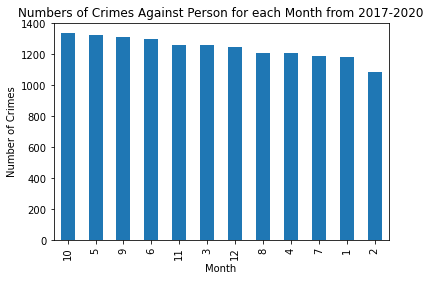

In [60]:
# Question: Do I need to sort the DF before plotting it to get the month in order?

# Number of crime in each month for all three years
crimect = person_crime_df['Month'].value_counts()
crimectplot = crimect.plot(kind='bar', title='Numbers of Crimes Against Person for each Month from 2017-2020')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

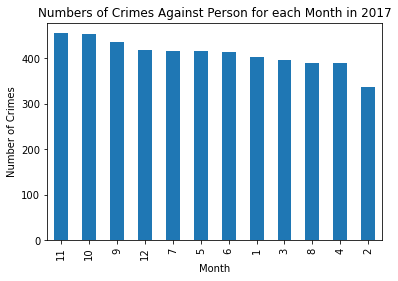

In [50]:
# Number of crime in each month for 2017
crimect_2017 = person_crime_2017df['Month'].value_counts()
crimect2017plot = crimect_2017.plot(kind='bar', title='Numbers of Crimes Against Person for each Month in 2017')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

In [15]:
# Plotting incidence of crime VS months
# def personcrime(df, x):
    # Bar plot

In [17]:
# Number of crimes in each city
# person_crime_city = person_crime_df.groupby('City')['City'].count()
# person_crime_city

# person_crime_city.plot(kind='bar', title='Numbers of Crime Against Person in each City', figsize=(8,8))
# plt.xlabel('City')
# plt.ylabel("Number of Cases")

# plt.xlim(-0.75, len(person_crime_city))
# plt.ylim(0, max(person_crime_city)+100)

# plt.tight_layout()
# plt.show()

# From here, maybe do a location

In [18]:
# # Look at sub category of crime -- ain't going there -_-
# person_crime_stat = person_crime_df.groupby('Crime Sub Category')['Crime Sub Category'].count()
# person_crime_stat

In [19]:
# person_crime_stat.plot(kind='bar', title='Count of Different Types of Crime Against Person')
# plt.xlabel('Types of Crime Against Person')
# plt.ylabel("Number of Cases")

# plt.xlim(-0.75, len(person_crime_stat))
# plt.ylim(0, max(person_crime_stat)+100)

# plt.show()

In [20]:
# Cynthia's code ends here

In [21]:
# Rose's code starts here - Society

In [22]:
# Rose's code ends here

In [23]:
# Paul's code starts here - API!!!

In [24]:
# Paul's code ends here